In [14]:
#setting parameters
import random
import math
p=0.9#the threshold of probability 
N=100#number of nodes in the graph
disthres=0.12
from Connect import is_connect,find_component

In [15]:
#generating the tested graph
#the existence of the edge between any two nodes is subjected to an uniform distribution on (0,1)
a=[0]*N
b=[0]*N
for x in range(N):
    a[x]=random.uniform(0,1)
    b[x]=random.uniform(0,1)
mat=[]#adjacent matrix
for x in range(N):
	mat.append([0]*N)
for x in range(N):
	for y in range(x+1,N):
		if random.uniform(0,1)<p and math.sqrt((a[x]-a[y])**2+(b[x]-b[y])**2)<disthres:
			mat[x][y]=1
			mat[y][x]=1

In [16]:
pip install matplotlib


The following command must be run outside of the IPython shell:

    $ pip install matplotlib

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


The graph is not connected


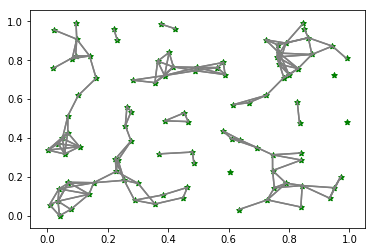

In [17]:
#test if the graph is connected
import matplotlib.pyplot as plt
plt.scatter(a,b,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([a[x],a[y]],[b[x],b[y]],color="grey")
plt.scatter(a,b,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([a[x],a[y]],[b[x],b[y]],color="grey")
is_connect(mat)

0,5,50,9,80,87,78,30,33,52,32,40,17,60,71,97
1,23,84
2,7,13,59,69,79,82,14,70,24,35
3,8,10,36,66,94,98,34,56,49,72,15,62,39,38,88,29,96
4,20,21,47,73,76,63,89,11,16,19,53,58,55,74,64,6,31,37,85,41,25,28
12,65,48,57,67,86,99,51,92,83,42,45,54,81,93,27,22
18,68
26
43
44,75,90
46,77
61,95
91


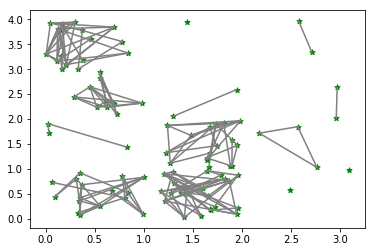

In [18]:
#find all the connected components in a graph
comp=find_component(mat)
numcomp=len(comp)
m=math.ceil(math.sqrt(numcomp))
xpos=[0]*N
ypos=[0]*N
for k in range(m):
    for r in range(m):
        ind=k*m+r
        if ind<numcomp:
            for nt in comp[ind]:
                xpos[nt]=random.uniform(k,k+1)
                ypos[nt]=random.uniform(r,r+1)
plt.scatter(xpos,ypos,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="grey")
            

The component consisting of the nodes:

0,5,50,9,80,87,78,30,33,52,32,40,17,60,71,97
has a cycle consisting of the nodes:

9,80,5
The component consisting of the nodes:

1,23,84
has no cycle

The component consisting of the nodes:

2,7,13,59,69,79,82,14,70,24,35
has a cycle consisting of the nodes:

7,69,2
The component consisting of the nodes:

3,8,10,36,66,94,98,34,56,49,72,15,62,39,38,88,29,96
has a cycle consisting of the nodes:

8,10,3
The component consisting of the nodes:

4,20,21,47,73,76,63,89,11,16,19,53,58,55,74,64,6,31,37,85,41,25,28
has a cycle consisting of the nodes:

47,16,21,4
The component consisting of the nodes:

12,65,48,57,67,86,99,51,92,83,42,45,54,81,93,27,22
has a cycle consisting of the nodes:

57,67,65
The component consisting of the nodes:

18,68
has no cycle

The component consisting of the nodes:

26
has no cycle

The component consisting of the nodes:

43
has no cycle

The component consisting of the nodes:

44,75,90
has a cycle consisting of the nodes:



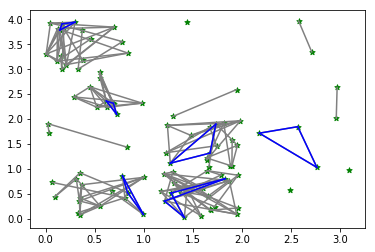

In [19]:
#find for each connected component if there is any cycle
from CycleGen import detect_cycle_gen
res=detect_cycle_gen(mat)
comp=res[0]
cmpcycle=res[1]
plt.scatter(xpos,ypos,label="nodes",color="green",marker="*",s=30)
for x in range(N):
    for y in range(x+1,N):
        if mat[x][y]==1:
            plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="grey")
for cycle in cmpcycle:
    if cycle!=[]:
        for t in range(len(cycle)-1):
            x=cycle[t]
            y=cycle[t+1]
            if mat[x][y]==1:
                plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="blue")
        x=cycle[len(cycle)-1]
        y=cycle[0]
        if mat[x][y]==1:
            plt.plot([xpos[x],xpos[y]],[ypos[x],ypos[y]],color="blue")